# Regresión Lineal con 3 variables

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

data_path= '../data/'

### Cargar y visualizar los datos

El dataset contiene información sobre el precio de varias viviendas en Zaragoza:
 - Primera columna: Tamaño de la vivienda en metros cuadrados
 - Segunda columna: Número de habitaciones
 - Tercera columna: Número de baños (baño: +1, aseo: +0.5)
 - Cuarta columna: Precio de la vivienda en miles de euros

In [3]:
# Load data
data1 = pd.read_csv(data_path + '01_houseprizes3v.csv', delimiter=';')
data1.head()

,Size,Dorms,Bath,Price
0,98,3,1.5,200
1,74,3,1.5,165
2,111,3,1.5,185
3,66,2,2.0,116
4,139,4,2.0,270


In [4]:
print(f"Data dimensions: {data1.shape}")

Data dimensions: (100, 4)


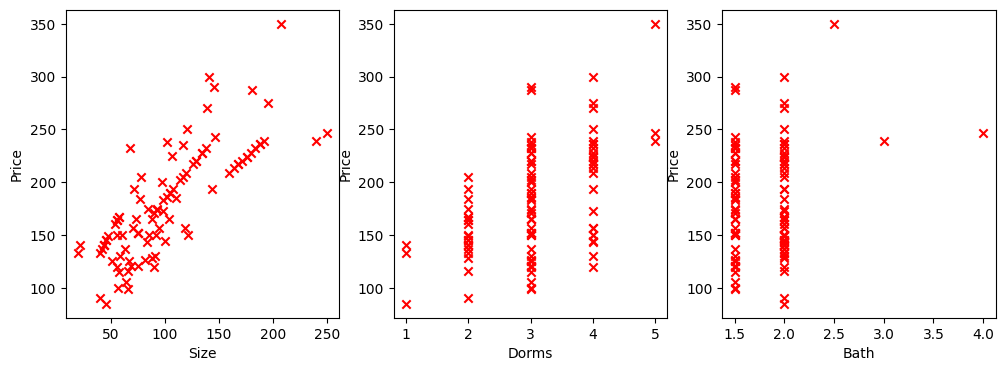

In [5]:
# Visualize data with three plots: prize-size, prize-bedrooms, price-bathrooms

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
ax1.scatter(data1['Size'], data1['Price'], marker='x', c='r')
ax1.set_xlabel('Size')
ax1.set_ylabel('Price')
ax2 = fig.add_subplot(132)
ax2.scatter(data1['Dorms'], data1['Price'], marker='x', c='r')
ax2.set_xlabel('Dorms')
ax2.set_ylabel('Price')
ax3 = fig.add_subplot(133)
ax3.scatter(data1['Bath'], data1['Price'], marker='x', c='r')
ax3.set_xlabel('Bath')
ax3.set_ylabel('Price')
plt.show()


In [6]:
# Separamos los datos en variables independientes (X) y dependientes (y), datos y etiquetas
X = data1.iloc[:,0:3].values
y = data1.iloc[:,3].values

print(X.shape, y.shape)

# Número de muestras:
m = len(y)


(100, 3) (100,)


### Normalización de los datos

Cuando se tienen características con diferetes escalas, es importante normalizar los datos para que las diferencias no afecten al rendimiento del modelo.

En nuestro caso los metros cuadrados están en el rango de 50 a 150 y el número de habitaciones y baños en el rango de 1 a 5.

Para comenzar, calculamos la media y desviación típica de cada característica:

In [7]:
# Calculamos media y desviación estándar de los datos para normalizarlos
mu = np.mean(X,axis=0)
sigma = np.std(X,axis=0)

print(f"Media: {mu}")
print(f"Desviación estándar: {sigma}")

Media: [102.24    3.06    1.805]
Desviación estándar: [49.06630616  0.84640416  0.35982635]


Conocidas la media y la desviación típica, definimos una función para normalizar los datos:

$$x_i = \frac{x_i - \mu_i}{\sigma_i}$$

In [8]:
# Feature Normalization
def fnormalize(X,mu,sigma):
    X_norm = np.zeros(X.shape)
    for i in range(X.shape[1]):
        temp_X = X[:,i]
        temp_X = (temp_X-mu[i])/sigma[i]
        X_norm[:,i]=temp_X
    return X_norm

In [9]:
X_norm = fnormalize(X,mu,sigma)

### Hipótesis

En esta ocasión tenemos 3 variables. Nuestra hipótesis es:

$$h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3$$

Y nuestro vector de parámetros theta es:

$$\theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ \theta_3 \end{bmatrix}$$

### Función de coste

La función de coste en su forma genérica sigue siendo la misma:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$$

La derivada de la función de coste es:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

### Preparación de los datos

Modificamos la matriz de datos normalizados para añadir una columna de unos al principio:

In [10]:
# First 5 rows of the normalized X
print(X_norm[:5,:])
print()

# Adding a columns of ones to normalized X
X_norm = np.hstack((np.ones((m,1)),X_norm))

# First 5 rows of the normalized X with ones added
print(X_norm[:5,:])


[[-0.08641368 -0.07088812 -0.84763109]
 [-0.57554771 -0.07088812 -0.84763109]
 [ 0.17853392 -0.07088812 -0.84763109]
 [-0.73859238 -1.2523568   0.54192808]
 [ 0.74919029  1.11058055  0.54192808]]

[[ 1.         -0.08641368 -0.07088812 -0.84763109]
 [ 1.         -0.57554771 -0.07088812 -0.84763109]
 [ 1.          0.17853392 -0.07088812 -0.84763109]
 [ 1.         -0.73859238 -1.2523568   0.54192808]
 [ 1.          0.74919029  1.11058055  0.54192808]]


In [11]:
# Intializing our parameter vector theta to zeros
theta = np.zeros((X_norm.shape[1],1))
theta

array([[0.],
       [0.],
       [0.],
       [0.]])

In [12]:
# Cost Function
def costFunction(X,y,theta):
    m = np.size(y)
    J = (1/(2*m)) * np.sum( np.power(X.dot(theta) - y.reshape(m,1), 2) )
    return J

In [13]:
# Finding the cost with theta intialized to zeros
J = costFunction(X_norm,y,theta)
print(f"Coste inicial: {J}")

Coste inicial: 17654.465


### Descenso de gradiente

In [14]:
# Gradient Descent Function
def gradientDescent(X,y,theta,alpha,iters):
    theta = np.mat(theta);
    m = np.size(y)
    J_history = np.zeros(iters)
    theta_history = np.zeros((iters,theta.shape[0]))

    J_history[0] = costFunction(X,y,theta)
    theta_history[0,:] = theta.T

    y = np.mat(y).T

    for i in range(1,iters):
        temp_theta = theta - (alpha / m) * (X.T * (X * theta - y))
        theta = temp_theta
        J_history[i] = costFunction(X,y,theta)
        theta_history[i] = theta.T
        
    return theta, J_history, theta_history

In [15]:
# Gradient Descent Settings
alpha = 0.01
#alpha = 0.001
#alpha = 0.0001
#alpha = 0.00001
num_iters = 1000

# Getting the optimum parameters using gradient descent
final_theta, J_history, theta_history = gradientDescent(X_norm,y,theta,alpha,num_iters)
print(f"Theta final: {final_theta}")
print(f"Coste final: {J_history[-1]}")

Theta final: [[180.902111  ]
 [ 48.93760848]
 [ -9.79473222]
 [ -4.9356121 ]]
Coste final: 427.58894363077746


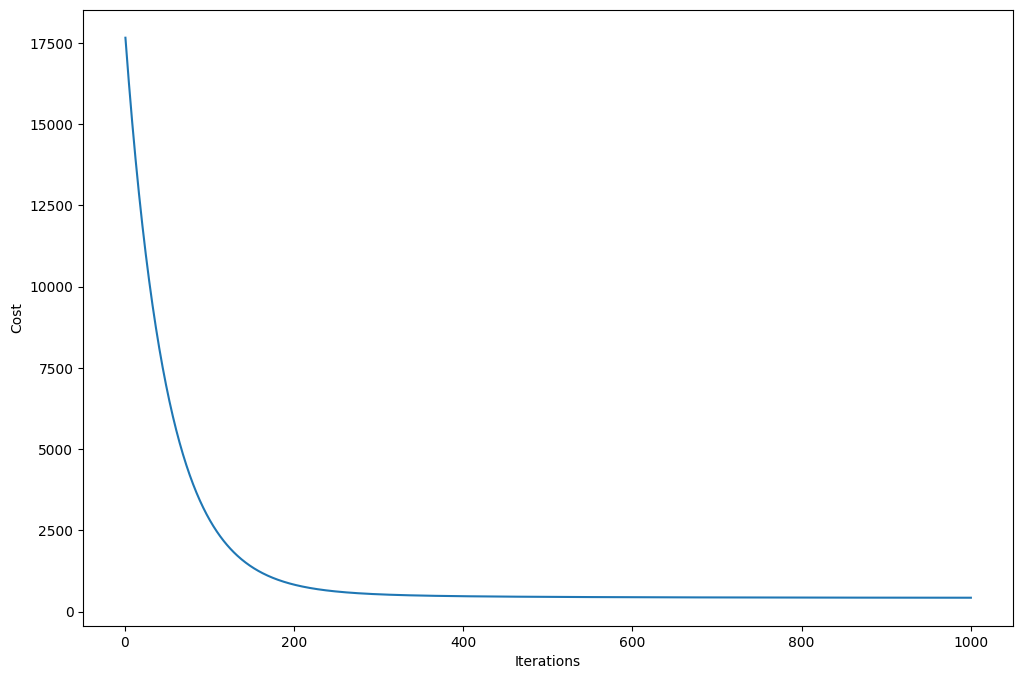

In [16]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(np.arange(1,num_iters+1),J_history)
plt.show()


In [17]:
# Cost at optimum theta
J_final = costFunction(X_norm,y,final_theta)
J_final

427.58894363077746

Utilizamos los parámetros calculados para predecir/estimar el precio de una vivienda de 200 metros cuadrados y 5 habitaciones:

In [18]:
# Función de la hipótesis
def h(x, theta):
    y = np.dot(x, theta)
    return y.item(0)

In [19]:
# Normalización de features
def normalize_features(x, mu, sigma):
    x = np.mat(x)
    x_norm = np.zeros(x.shape)
    for i in range(x.shape[1]):
        x_norm[:,i] = (x[:,i] - mu[i]) / sigma[i]
    return x_norm[0]

In [20]:
# Pre processing the features
x_pred_norm = normalize_features([200,5,3.5], mu, sigma)

# Adding a column of ones to x_pred_norm
x_pred_norm = np.hstack((np.ones(1), x_pred_norm))

# Actual Prediction
price = h(x_pred_norm, final_theta)

print("Predicted price of a 200 m^2, 5 bedrooms and 3 bathrooms house:\n €",price)

Predicted price of a 200 m^2, 5 bedrooms and 3 bathrooms house:
 € 232.7059626328856


## Visualización de la función de coste

In [45]:
def display_costFunction_3d(theta, theta_vals, val0, val1):
    xx, yy = np.meshgrid(theta_vals[val0], theta_vals[val1], indexing='ij')
    J_vals = np.zeros((theta_vals[val0].size, theta_vals[val1].size))

    for (i,j),v in np.ndenumerate(J_vals):
        t = np.array([[theta_i] for theta_i in theta])
        t[val0] = xx[i,j]
        t[val1] = yy[i,j]

        J_vals[i,j] = costFunction(X_norm, y, t)

    # 3-D Surface plot of the Cost Function 
    fig = plt.figure(figsize=(9,6),dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx,yy,J_vals,alpha =0.7,cmap=cm.jet)
    ax.view_init(azim=230)
    
    ax.xaxis.set_ticks(np.linspace(theta_vals[val0].min(),theta_vals[val0].max(),10))
    ax.yaxis.set_ticks(np.linspace(theta_vals[val1].min(),theta_vals[val1].max(),10))

    plt.xlabel(f'$\Theta_{val0}$')
    plt.ylabel(f'$\Theta_{val1}$')
    ax.set_zlabel('J')

    return plt

def display_contours(theta, theta_history, theta_vals, val0, val1):
    xx, yy = np.meshgrid(theta_vals[val0], theta_vals[val1], indexing='ij')
    J_vals = np.zeros((theta_vals[val0].size, theta_vals[val1].size))

    for (i,j),v in np.ndenumerate(J_vals):
        t = np.array([[theta_i] for theta_i in theta])
        t[val0] = xx[i,j]
        t[val1] = yy[i,j]

        J_vals[i,j] = costFunction(X_norm, y, t)

    # Contour plot of the Cost Function 
    plt.figure(figsize=(9,6),dpi=100)
    
    # Calculate logspace given J_vals min and max
    J_min_log = np.log10(J_vals.min())
    J_max_log = np.log10(J_vals.max())
    J_vals_logspace = np.logspace(J_min_log, J_max_log, num=10)

    plt.contour(xx,yy,J_vals,levels=J_vals_logspace, cmap=cm.jet)
    plt.xlabel(f'$\Theta_{val0}$')
    plt.ylabel(f'$\Theta_{val1}$')

    # 10 equaly spaced values for theta[val0] and theta[val1]
    step_size = int(theta_history.shape[0]/(10-1))
    theta_history_subset = theta_history[::step_size,:]

    plt.plot(theta_history_subset[:,val0],theta_history_subset[:,val1],'rx',markersize=10,linewidth=2)
    #plt.plot(theta0_vals,theta1_vals,'rx',markersize=10,linewidth=2)

    #plt.plot(theta[0],theta[1],'rx',markersize=10,linewidth=2)
    plt.colorbar()

    return plt


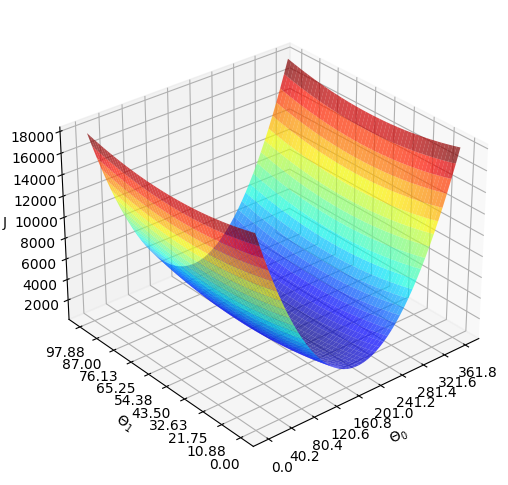

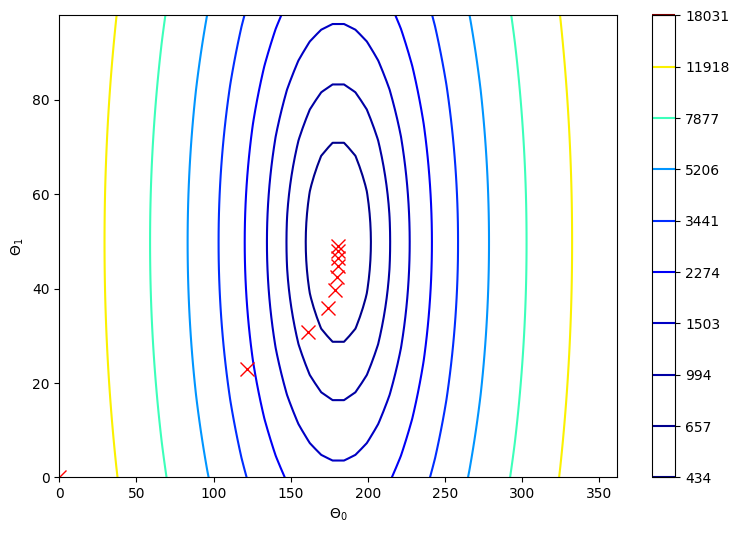

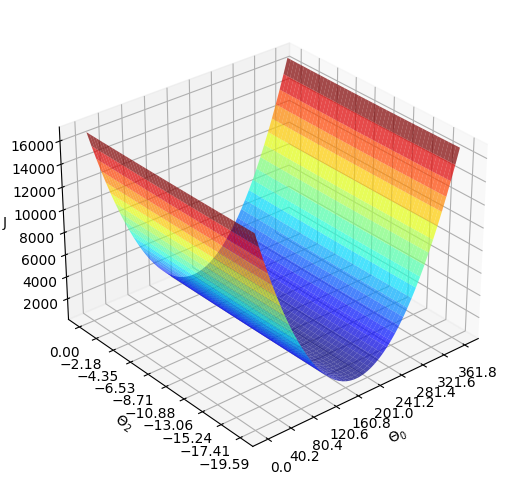

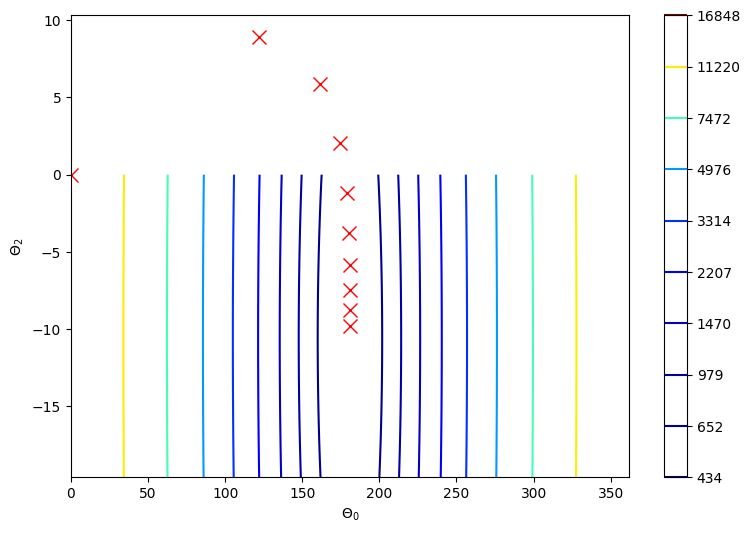

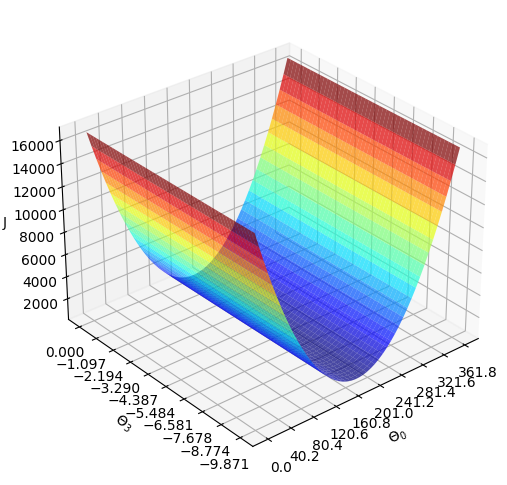

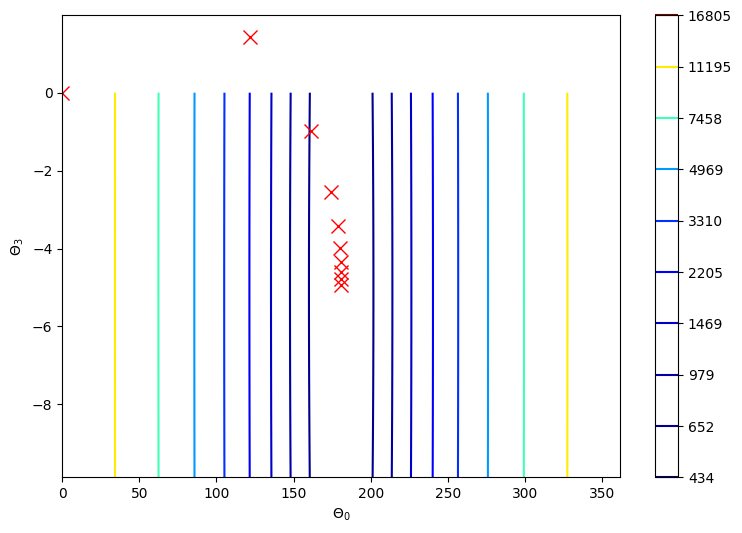

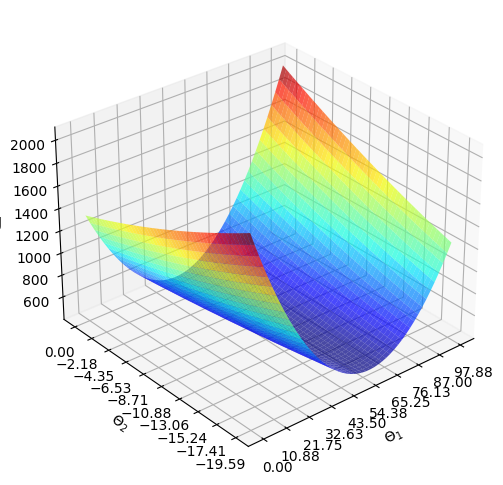

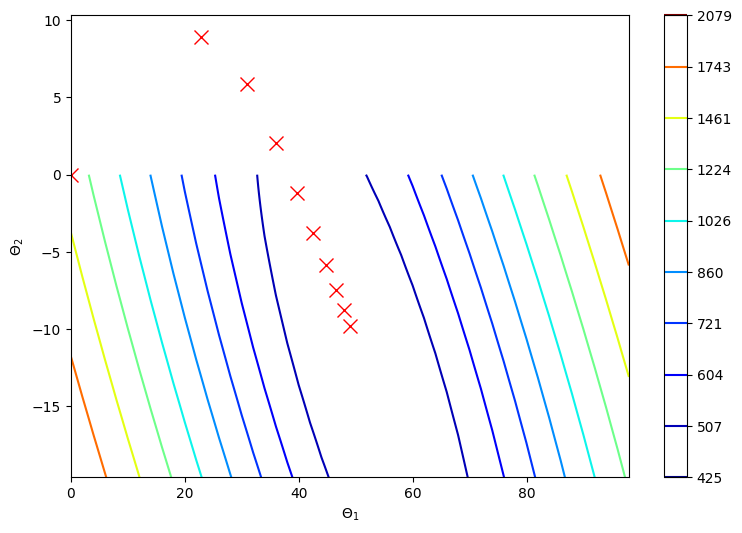

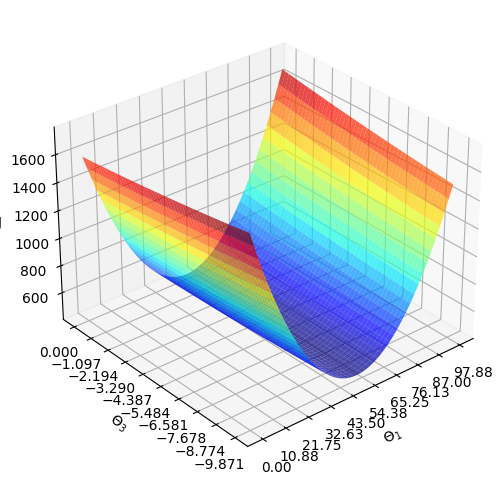

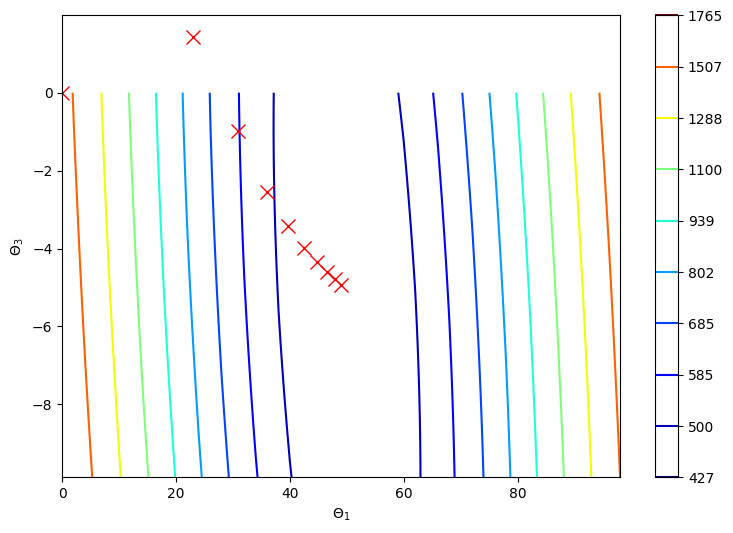

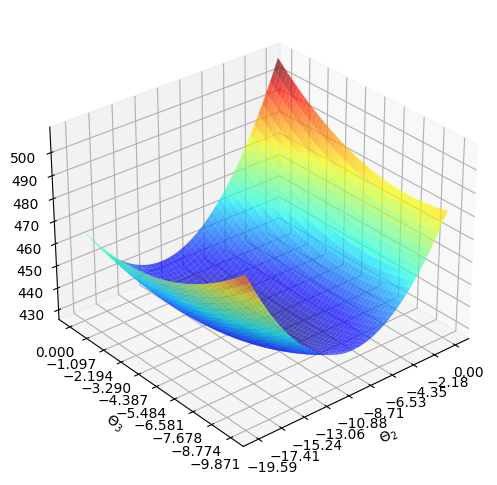

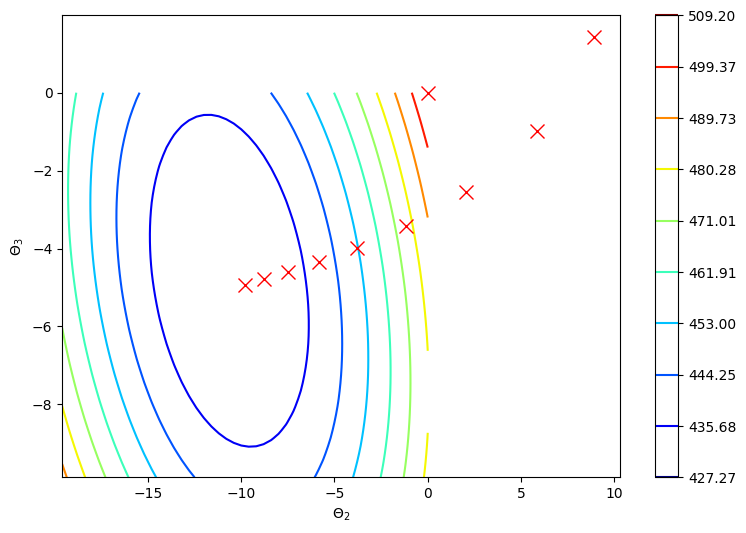

In [47]:
theta = [final_theta.item(0), final_theta.item(1), final_theta.item(2), final_theta.item(3)]

# Intialising the grid over which to call the Cost Function
# Used for plotting surface and contour plots 
theta_vals = []
for theta_i in theta:
    theta_vals_i = np.linspace(theta_i - abs(theta_i), theta_i + abs(theta_i))
    theta_vals.append(theta_vals_i)

# All possible combinations of pairs within range(0, len(theta)), no repetitions (0, 1) and (1, 0) are the same
theta_pairs = [(i,j) for i in range(len(theta)) for j in range(len(theta)) if i < j]

# Plotting the surface plots for all pairs of theta
for val0, val1 in theta_pairs:
    display_costFunction_3d(theta, theta_vals, val0, val1).show()
    display_contours(theta, theta_history, theta_vals, val0, val1).show()


